In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\ishit\OneDrive\Desktop\ca\datasets\data_science_job.csv")

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [10]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [11]:
#perform cca where less than 5 percent values are missing


In [12]:
df.shape

(19158, 13)

In [13]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [14]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1764,0.550,no_enrollment,Graduate,5.0,37.0
15443,0.920,no_enrollment,Graduate,20.0,7.0
16116,0.920,no_enrollment,Graduate,20.0,29.0
507,0.802,Full time course,Graduate,8.0,314.0
5963,0.855,NaN,Graduate,14.0,27.0


In [15]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [16]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [18]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

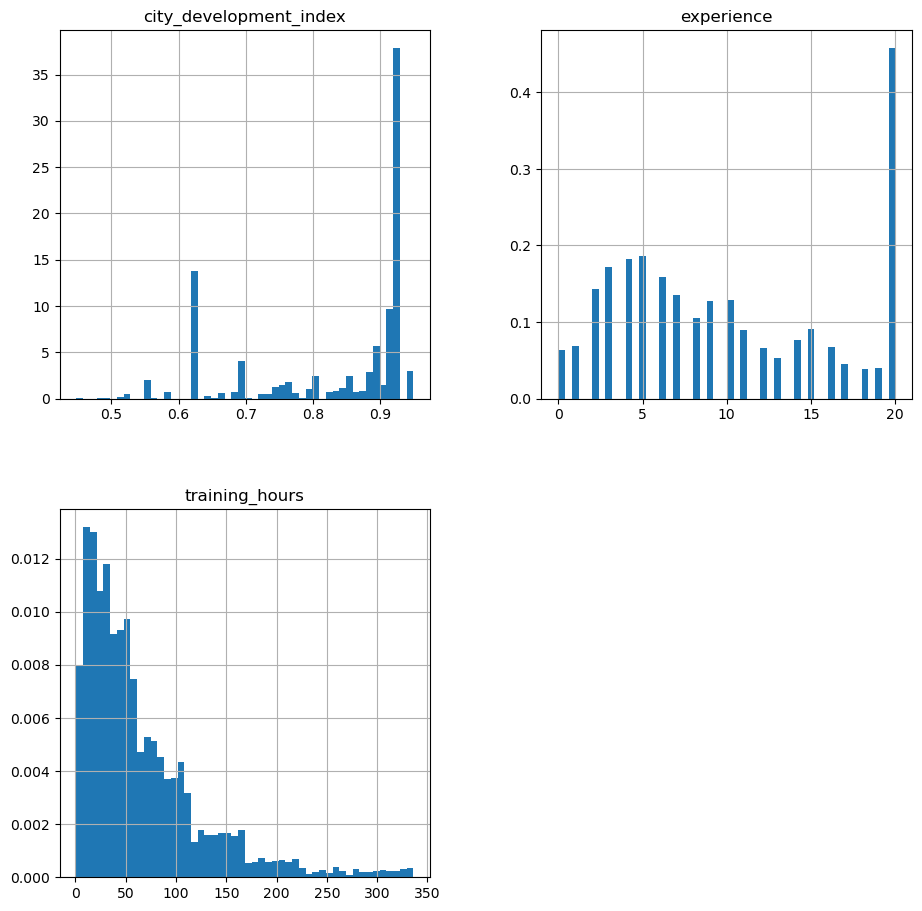

In [24]:
new_df.hist(bins=50,density=True,figsize=(11,11))
plt.show()

we will see similarities and compare new_df with previous df by overallaping histographs

<Axes: >

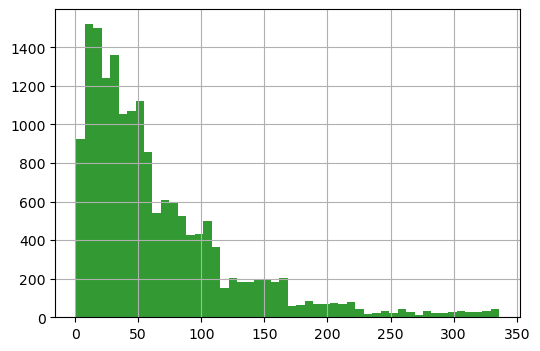

In [27]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)

#original data
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

## data after cca, the argument alpha makes the color transparent, so we can
# see the overlap of the 2 distributions
new_df['training_hours'].hist(bins=50,ax=ax,color='green',alpha=0.8)

<Axes: ylabel='Density'>

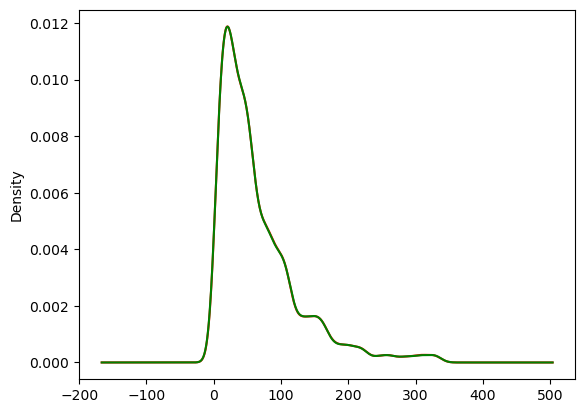

In [30]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
df['training_hours'].plot.density(color='red')

#data after cca
new_df['training_hours'].plot.density(color='green')

#the density curve is almost overlapping

<Axes: >

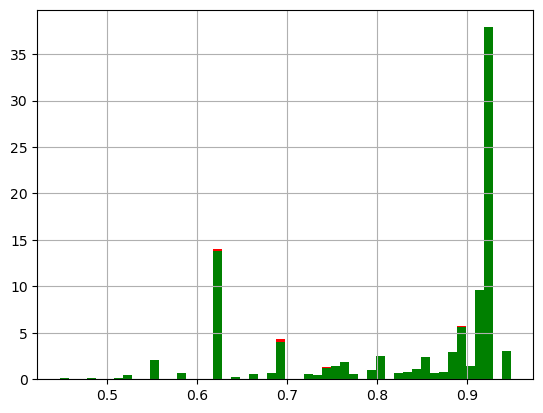

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original
df['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')

#data after cca
new_df['city_development_index'].hist(bins=50,ax=ax,density=True,color='green')

<Axes: ylabel='Density'>

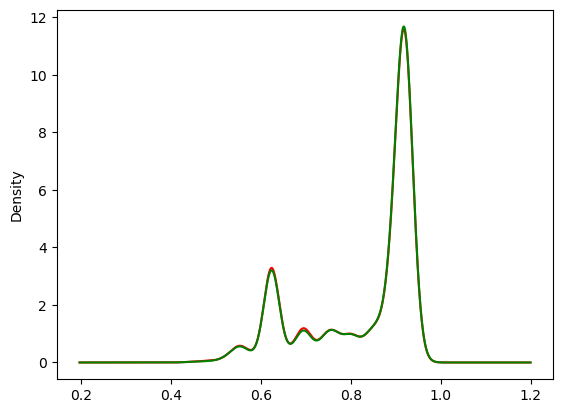

In [35]:
#density curve for city_development_index

#original
df['city_development_index'].plot.density(color='red')
new_df['city_development_index'].plot.density(color='green')

<Axes: >

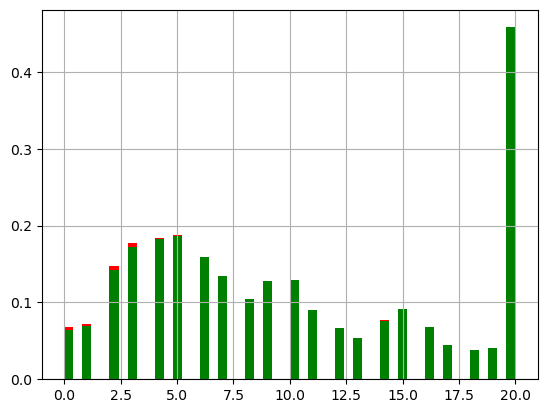

In [37]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['experience'].hist(bins=50,ax=ax,density=True,color='red')

#data after cca
new_df['experience'].hist(bins=50,ax=ax,density=True,color='green')

<Axes: ylabel='Density'>

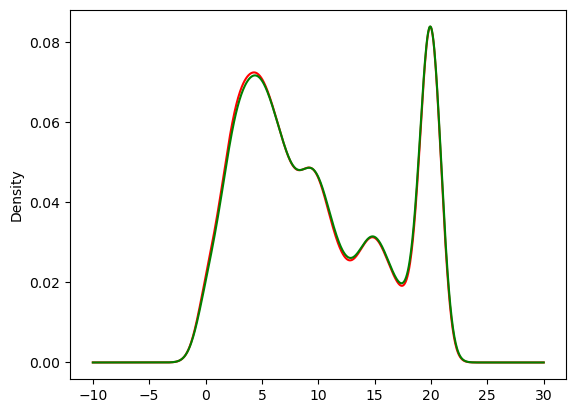

In [38]:
#density curve for experience

df['experience'].plot.density(color='red')
new_df['experience'].plot.density(color='green')

In [40]:
#comparing ratios for non numerical values

temp=pd.concat([
    # percentage of observations per category, original data
    df['enrolled_university'].value_counts()/len(df),
    
    # percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
    
],axis=1)

#add column names
temp.columns=['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [41]:
temp=pd.concat([
    df['education_level'].value_counts()/len(df),
    
    new_df['education_level'].value_counts()/len(new_df)
],axis=1)

temp.columns=['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [ ]:
#ratios are very similar as seen